In [83]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn;seaborn.set()
from scipy.signal import argrelextrema
from datetime import datetime, timedelta
from random import shuffle
import DataBase
from threading import Thread
from multiprocessing import Manager, Pool
import time
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# %matplotlib inline

In [3]:
stocks_data = pickle.load(open("FullData_5.p", "rb"))

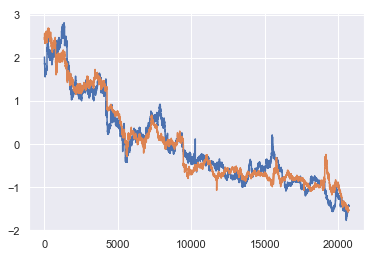

In [55]:
tickers = ['ACLS', 'PRTK']
plt.plot(StandardScaler().fit_transform(stocks_data.loc[:, tickers].fillna(method='bfill').fillna(method='ffill')))

In [37]:
correlated_stocks = pd.DataFrame(columns=['Stock A', 'Stock B'])
stocks_data_ds = stocks_data.loc[::6, :]
for ticker_a in range(len(stocks_data.columns)):
    print('{}/{}'.format(ticker_a, len(stocks_data.columns)))
    for ticker_b in range(ticker_a+1, len(stocks_data.columns)):
        ser_a = stocks_data_ds.iloc[:, ticker_a] - stocks_data_ds.iloc[:, ticker_a].mean()
        ser_b = stocks_data_ds.iloc[:, ticker_b] - stocks_data_ds.iloc[:, ticker_b].mean()
        num = (ser_a * ser_b).sum()
        den = ((ser_a ** 2).sum() * (ser_b ** 2).sum()) ** 0.5
        corr = num / den
        if corr > 0.95:         
            correlated_stocks = correlated_stocks.append(pd.DataFrame([[list(stocks_data.columns)[ticker_a], list(stocks_data.columns)[ticker_b]]], columns=['Stock A', 'Stock B']))


0/994


C:\Users\Alexis\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


1/994


2/994


3/994


4/994


5/994


6/994


7/994


8/994


9/994


10/994


11/994


12/994


13/994


14/994


15/994


16/994


17/994


18/994


19/994


20/994


21/994


22/994


23/994


24/994


25/994


26/994


27/994


28/994


29/994


30/994


31/994


32/994


33/994


34/994


35/994


36/994


37/994


38/994


39/994


40/994


41/994


42/994


43/994


44/994


45/994


46/994


47/994


48/994


49/994


50/994


51/994


52/994


53/994


54/994


55/994


56/994


57/994


58/994


59/994


60/994


61/994


62/994


63/994


64/994


65/994


66/994


67/994


68/994


69/994


70/994


71/994


72/994


73/994


74/994


75/994


76/994


77/994


78/994


79/994


80/994


81/994


82/994


83/994


84/994


85/994


86/994


87/994


88/994


89/994


90/994


91/994


92/994


93/994


94/994


95/994


96/994


97/994


98/994


99/994


100/994


101/994


102/994


103/994


104/994


105/994


106/994


107/994


108/994


109/994


110/994


111/994


112/994


113/994


114/994


115/994


116/994


117/994


118/994


119/994


120/994


121/994


122/994


123/994


124/994


125/994


126/994


127/994


128/994


129/994


130/994


131/994


132/994


133/994


134/994


135/994


136/994


137/994


138/994


139/994


140/994


141/994


142/994


143/994


144/994


145/994


146/994


147/994


148/994


149/994


150/994


151/994


152/994


153/994


154/994


155/994


156/994


157/994


158/994


159/994


160/994


161/994


162/994


163/994


164/994


165/994


166/994


167/994


168/994


169/994


170/994


171/994


172/994


173/994


174/994


175/994


176/994


177/994


178/994


179/994


180/994


181/994


182/994


183/994


184/994


185/994


186/994


187/994


188/994


189/994


190/994


191/994


192/994


193/994


194/994


195/994


196/994


197/994


198/994


199/994


200/994


201/994


202/994


203/994


204/994


205/994


206/994


207/994


208/994


209/994


210/994


211/994


212/994


213/994


214/994


215/994


216/994


217/994


218/994


219/994


220/994


221/994


222/994


223/994


224/994


225/994


226/994


227/994


228/994


229/994


230/994


231/994


232/994


233/994


234/994


235/994


236/994


237/994


238/994


239/994


240/994


241/994


242/994


243/994


244/994


245/994


246/994


247/994


248/994


249/994


250/994


251/994


252/994


253/994


254/994


255/994


256/994


257/994


258/994


259/994


260/994


261/994


262/994


263/994


264/994


265/994


266/994


267/994


268/994


269/994


270/994


271/994


272/994


273/994


274/994


275/994


276/994


277/994


278/994


279/994


280/994


281/994


282/994


283/994


284/994


285/994


286/994


287/994


288/994


289/994


290/994


291/994


292/994


293/994


294/994


295/994


296/994


297/994


298/994


299/994


300/994


301/994


302/994


303/994


304/994


305/994


306/994


307/994


308/994


309/994


310/994


311/994


312/994


313/994


314/994


315/994


316/994


317/994


318/994


319/994


320/994


321/994


322/994


323/994


324/994


325/994


326/994


327/994


328/994


329/994


330/994


331/994


332/994


333/994


334/994


335/994


336/994


337/994


338/994


339/994


340/994


341/994


342/994


343/994


344/994


345/994


346/994


347/994


348/994


349/994


350/994


351/994


352/994


353/994


354/994


355/994


356/994


357/994


358/994


359/994


360/994


361/994


362/994


363/994


364/994


365/994


366/994


367/994


368/994


369/994


370/994


371/994


372/994


373/994


374/994


375/994


376/994


377/994


378/994


379/994


380/994


381/994


382/994


383/994


384/994


385/994


386/994


387/994


388/994


389/994


390/994


391/994


392/994


393/994


394/994


395/994


396/994


397/994


398/994


399/994


400/994


401/994


402/994


403/994


404/994


405/994


406/994


407/994


408/994


409/994


410/994


411/994


412/994


413/994


414/994


415/994


416/994


417/994


418/994


419/994


420/994


421/994


422/994


423/994


424/994


425/994


426/994


427/994


428/994


429/994


430/994


431/994


432/994


433/994


434/994


435/994


436/994


437/994


438/994


439/994


440/994


441/994


442/994


443/994


444/994


445/994


446/994


447/994


448/994


449/994


450/994


451/994


452/994


453/994


454/994


455/994


456/994


457/994


458/994


459/994


460/994


461/994


462/994


463/994


464/994


465/994


466/994


467/994


468/994


469/994


470/994


471/994


472/994


473/994


474/994


475/994


476/994


477/994


478/994


479/994


480/994


481/994


482/994


483/994


484/994


485/994


486/994


487/994


488/994


489/994


490/994


491/994


492/994


493/994


494/994


495/994


496/994


497/994


498/994


499/994


500/994


501/994


502/994


503/994


504/994


505/994


506/994


507/994


508/994


509/994


510/994


511/994


512/994


513/994


514/994


515/994


516/994


517/994


518/994


519/994


520/994


521/994


522/994


523/994


524/994


525/994


526/994


527/994


528/994


529/994


530/994


531/994


532/994


533/994


534/994


535/994


536/994


537/994


538/994


539/994


540/994


541/994


542/994


543/994


544/994


545/994


546/994


547/994


548/994


549/994


550/994


551/994


552/994


553/994


554/994


555/994


556/994


557/994


558/994


559/994


560/994


561/994


562/994


563/994


564/994


565/994


566/994


567/994


568/994


569/994


570/994


571/994


572/994


573/994


574/994


575/994


576/994


577/994


578/994


579/994


580/994


581/994


582/994


583/994


584/994


585/994


586/994


587/994


588/994


589/994


590/994


591/994


592/994


593/994


594/994


595/994


596/994


597/994


598/994


599/994


600/994


601/994


602/994


603/994


604/994


605/994


606/994


607/994


608/994


609/994


610/994


611/994


612/994


613/994


614/994


615/994


616/994


617/994


618/994


619/994


620/994


621/994


622/994


623/994


624/994


625/994


626/994


627/994


628/994


629/994


630/994


631/994


632/994


633/994


634/994


635/994


636/994


637/994


638/994


639/994


640/994


641/994


642/994


643/994


644/994


645/994


646/994


647/994


648/994


649/994


650/994


651/994


652/994


653/994


654/994


655/994


656/994


657/994


658/994


659/994


660/994


661/994


662/994


663/994


664/994


665/994


666/994


667/994


668/994


669/994


670/994


671/994


672/994


673/994


674/994


675/994


676/994


677/994


678/994


679/994


680/994


681/994


682/994


683/994


684/994


685/994


686/994


687/994


688/994


689/994


690/994


691/994


692/994


693/994


694/994


695/994


696/994


697/994


698/994


699/994


700/994


701/994


702/994


703/994


704/994


705/994


706/994


707/994


708/994


709/994


710/994


711/994


712/994


713/994


714/994


715/994


716/994


717/994


718/994


719/994


720/994


721/994


722/994


723/994


724/994


725/994


726/994


727/994


728/994


729/994


730/994


731/994


732/994


733/994


734/994


735/994


736/994


737/994


738/994


739/994


740/994


741/994


742/994


743/994


744/994


745/994


746/994


747/994


748/994


749/994


750/994


751/994


752/994


753/994


754/994


755/994


756/994


757/994


758/994


759/994


760/994


761/994


762/994


763/994


764/994


765/994


766/994


767/994


768/994


769/994


770/994


771/994


772/994


773/994


774/994


775/994


776/994


777/994


778/994


779/994


780/994


781/994


782/994


783/994


784/994


785/994


786/994


787/994


788/994


789/994


790/994


791/994


792/994


793/994


794/994


795/994


796/994


797/994


798/994


799/994


800/994


801/994


802/994


803/994


804/994


805/994


806/994


807/994


808/994


809/994


810/994


811/994


812/994


813/994


814/994


815/994


816/994


817/994


818/994


819/994


820/994


821/994


822/994


823/994


824/994


825/994


826/994


827/994


828/994


829/994


830/994


831/994


832/994


833/994


834/994


835/994


836/994


837/994


838/994


839/994


840/994


841/994


842/994


843/994


844/994


845/994


846/994


847/994


848/994


849/994


850/994


851/994


852/994


853/994


854/994


855/994


856/994


857/994


858/994


859/994


860/994


861/994


862/994
863/994


864/994


865/994
866/994


867/994


868/994
869/994


870/994


871/994
872/994


873/994
874/994


875/994
876/994


877/994
878/994


879/994
880/994


881/994
882/994


883/994
884/994


885/994
886/994


887/994
888/994


889/994
890/994


891/994
892/994


893/994
894/994


895/994
896/994


897/994
898/994


899/994
900/994

901/994
902/994


903/994


904/994
905/994


906/994
907/994


908/994
909/994


910/994
911/994


912/994
913/994


914/994
915/994


916/994
917/994


918/994
919/994


920/994
921/994


922/994
923/994
924/994


925/994


926/994
927/994
928/994


929/994


930/994
931/994
932/994


933/994
934/994
935/994


936/994
937/994
938/994


939/994
940/994
941/994


942/994
943/994
944/994


945/994
946/994
947/994


948/994
949/994
950/994


951/994
952/994
953/994
954/994


955/994
956/994
957/994
958/994


959/994
960/994
961/994
962/994


963/994
964/994
965/994
966/994
967/994


968/994
969/994
970/994
971/994
972/994
973/994


974/994
975/994
976/994
977/994
978/994
979/994
980/994
981/994
982/994


983/994
984/994
985/994
986/994
987/994
988/994
989/994
990/994
991/994
992/994
993/994


In [55]:
correlated_stocks.tail()

,Stock A,Stock B
0,VRSK,ZBRA
0,VRSN,VSTM
0,VRSN,WIX
0,WIX,ZBRA
0,ZG,Z


(2.2590126338674787, -99.13747605908281)

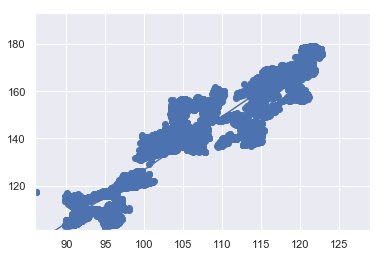

In [29]:
X = stocks_data.loc[:, tickers[0]].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, tickers[1]].fillna(method='bfill').fillna(method='ffill')

Xsm = sm.add_constant(X.values)
model = sm.OLS(Y.values, Xsm)
intercept, gamma = model.fit().params

plt.scatter(X, Y)
x = pd.Series(range(int(max(X))))
plt.plot(gamma * x + intercept)
plt.xlim(left=int(min(X)))
plt.ylim(bottom=int(min(Y)))

gamma, intercept

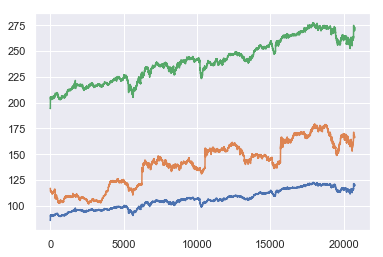

In [30]:
plt.plot(stocks_data.loc[:, tickers].fillna(method='bfill').fillna(method='ffill').reset_index(drop=True))
plt.plot(X.reset_index(drop=True) * gamma)

In [31]:
mu = (Y - X * gamma).mean()
residual = (Y - X * gamma) - mu

In [35]:
adfuller(residual)[0]

-3.2709610016121653

In [47]:
len(correlated_stocks)

2704

In [50]:
adf_scores = pd.DataFrame(columns=['Stock A', 'Stock B', 'Score'])
i = 0
for pair in correlated_stocks[:150].iterrows():
    print(i)
    i += 1
    stock_a = pair[1].loc['Stock A']
    stock_b = pair[1].loc['Stock B']
    X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
    Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')
    Xsm = sm.add_constant(X.values)
    model = sm.OLS(Y.values, Xsm)
    intercept, gamma = model.fit().params
    mu = (Y - X * gamma).mean()
    residual = (Y - X * gamma) - mu
    adf = adfuller(residual)[0]
    adf_scores = adf_scores.append(pd.DataFrame([[stock_a, stock_b, adf]], columns=['Stock A', 'Stock B', 'Score']))


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


100


101


102


103


104


105


106


107


108


109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146


147


148


149


In [54]:
adf_scores.sort_values('Score')

,Stock A,Stock B,Score
0,ACLS,PRTK,-5.465851
0,AAPL,BCRX,-5.360072
0,AAPL,HMSY,-4.982297
0,ACLS,PBYI,-4.908501
0,AAXN,CERS,-4.667091
0,ACLS,SHY,-4.646367
0,ACLS,TSRO,-4.582198
0,ABMD,IART,-4.579449
0,ABMD,LOXO,-4.451316
0,ACET,INCY,-4.425509


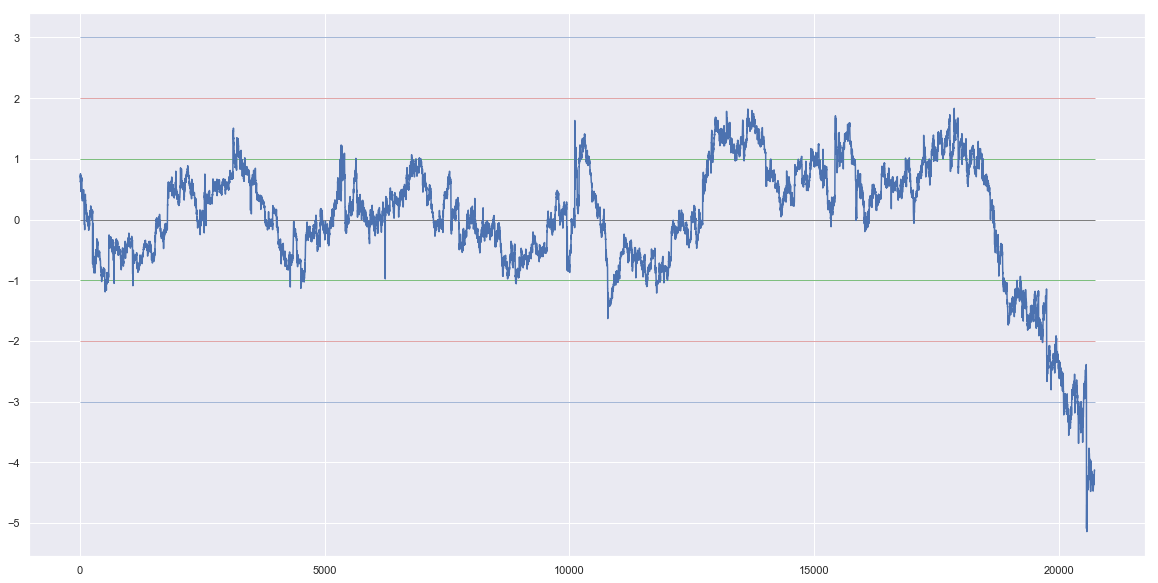

In [86]:
stock_a = 'ADBE'
stock_b = 'APTI'
X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')
Xsm = sm.add_constant(X.values)
model = sm.OLS(Y.values, Xsm)
intercept, gamma = model.fit().params
mu = (Y - X * gamma).mean()
residual = (Y - X * gamma) - mu

plt.figure(figsize=(20, 10))
plt.plot(StandardScaler(with_std=True).fit_transform(residual.values.reshape(-1, 1)))
plt.hlines(0, xmin=0, xmax=len(residual), linewidth=0.5, color='black')
plt.hlines(1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
plt.hlines(-1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
plt.hlines(2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
plt.hlines(-2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
plt.hlines(3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')
plt.hlines(-3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')

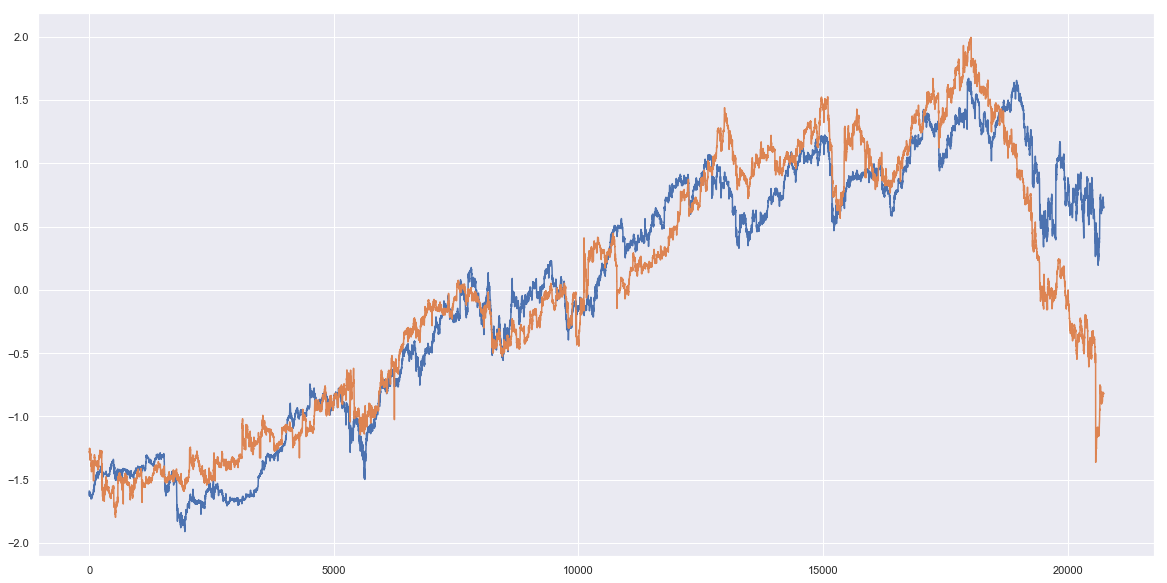

In [87]:
X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')

plt.figure(figsize=(20, 10))
plt.plot(StandardScaler().fit_transform(stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill')))
